In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data=pd.read_csv("titanic_train.csv")



In [65]:
data1=data.drop(["Name","PassengerId","Ticket","Cabin"],axis=1)
data1.head(10)


(891, 8)

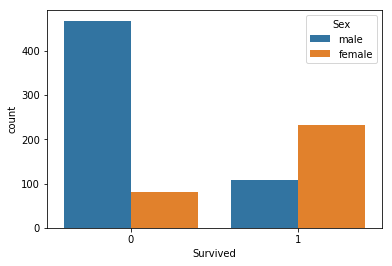

In [66]:
sns.countplot(x="Survived",hue="Sex",data=data1)


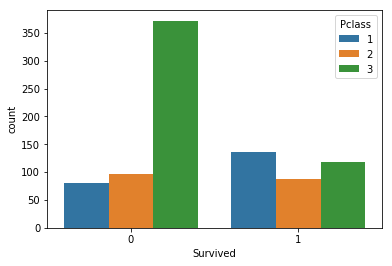

In [67]:
sns.countplot(x="Survived",hue="Pclass",data=data1)

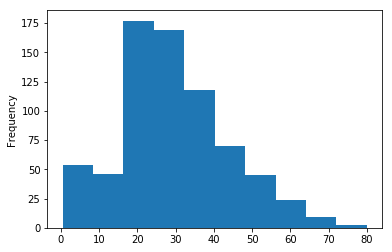

In [68]:
data1["Age"].plot.hist()


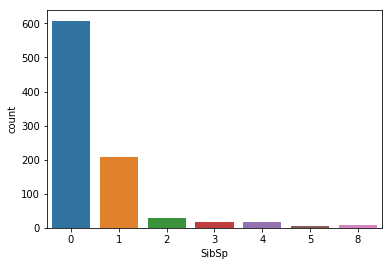

In [69]:
sns.countplot(x="SibSp",data=data1)

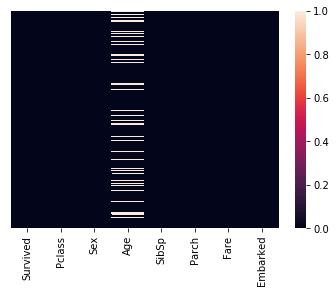

In [70]:
sns.heatmap(data1.isnull(),yticklabels=False) #for colour coding include attribute cmap="viridis"

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

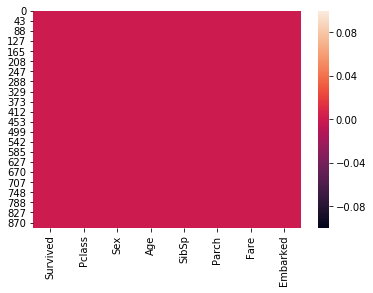

In [77]:
#now drop all those rows where values are null
data1.dropna(inplace=True)      #after executing this command the rows are already deleted so is we draw the heatmap again ,
                                # then it will be blank
sns.heatmap(data1.isnull())
data1.isnull().sum()   #now the dataset is clean

In [78]:
data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [103]:
sex=pd.get_dummies(data1["Sex"],drop_first=True)
emb=pd.get_dummies(data1["Embarked"],drop_first=True)
pcls=pd.get_dummies(data1["Pclass"],drop_first=True)
#data1=pd.concat([data1,sex,emb,pcls],axis=1)
data2=data1.drop(["Pclass","Sex","Embarked"],axis=1)

data2=data2.iloc[:,0:10]
#data2.info()
data2.head()



(712, 10)

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
x=data2.iloc[:,1:8]
y=data2.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
model=LogisticRegression()
model.fit(X_train,y_train)
ypred=model.predict(X_test)
print("confussion matrix","\n",confusion_matrix(ypred,y_test),"\n")
print("Accuracy is :",accuracy_score(ypred,y_test)*100,"%")

confussion matrix 
 [[111  28]
 [ 28  68]] 

Accuracy is : 76.17021276595744 %


C:\Users\Raghav Rastogi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [170]:
import scipy.optimize
from sklearn.model_selection import train_test_split

xd=np.c_[np.ones((x.shape[0],1)),x]
theta=np.zeros((xd.shape[1],1))

yd=data2.iloc[:,0].values
yd=yd[:,np.newaxis]

x_train,x_test,ytrain,ytest=train_test_split(xd,yd,test_size=0.3,random_state=1)

def sigmoid(x):
    return 1/(1+np.exp(-x))

def input_data(theta,x):
    return np.dot(x,theta)

def prob(theta,x):
    return sigmoid(input_data(theta,x))

def cost_func(theta,x,y):
    m=xd.shape[0]
    cost=-(1/m)*np.sum(y*np.log(sigmoid(input_data(theta,x)))+(1-y)*(np.log(1-sigmoid(input_data(theta,x)))))
    return cost

def gradient(theta,x,y):
    m=xd.shape[0]
    return (1/m)*np.dot(x.T,prob(theta,x)-y)

def fit(theta,x,y):
    op=scipy.optimize.fmin_tnc(func=cost_func,x0=theta,fprime=gradient,args=(x,y.flatten()))
    return op[0]

parameter=fit(theta,x_train,ytrain)
parameter=parameter[:,np.newaxis]


ypred_test=prob(parameter,x_test)
ypred_test=(ypred_test>=0.5).astype(int)
acc=np.mean(ypred_test==ytest)
print("Accuracy is",acc*100,"%")


Accuracy is 76.63551401869158 %
